###### Analyzing salary of data scientists in India

In [ ]:
#Try nltk or spacy or textblob or stanford NLP for the text columns

In [1]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
train = pd.read_csv('Data/Final_Train_Dataset.csv')
test = pd.read_csv('Data/Final_Test_Dataset.csv')

In [3]:
(train.isna().sum()/len(train))*100

Unnamed: 0               0.000000
experience               0.000000
job_description         22.310878
job_desig                0.000000
job_type                75.775174
key_skills               0.005050
location                 0.000000
salary                   0.000000
company_name_encoded     0.000000
dtype: float64

In [4]:
train['job_type'].unique()

array([nan, 'Analytics', 'analytics', 'Analytic', 'ANALYTICS', 'analytic'],
      dtype=object)

###### We will get rid of the job_type column since it has 75% of data missing and also it only has one logical entry called Analytics.

In [5]:
train.drop(['Unnamed: 0','job_type'],axis = 1,inplace = True)

In [6]:
len(train['company_name_encoded'].unique())

5035

###### Here the company name is a categorical column represented in numerical format or label encoded.

In [7]:
train.sort_values('company_name_encoded')[:50]

,experience,job_description,job_desig,key_skills,location,salary,company_name_encoded
14337,10-15 yrs,10-15 years of overall experience in Manufactu...,Head of Technology - Industrial IOT Leader,"Data Science, Industrial IOT, Smart Factory, I...",Mumbai,25to50,0
10759,1-2 yrs,1-2 years of experience in implementing BI sol...,Tableau Associate,"Business Development, Business Analytics, Clie...",Pune,3to6,1
984,0-2 yrs,Job description: Associates will have the opp...,Analytics Associate,"Predictive Analytics, SQL, R, SAS, Business An...",Pune(Hadapsar),3to6,2
7424,0-2 yrs,Job description: Associates will have the opp...,Analytics Associate,"Predictive Analytics, SQL, R, SAS, Business An...",Pune(Hadapsar),6to10,2
10946,8-13 yrs,Role purpose Support department head in ma...,Manager - Risk & Information Management,"credit risk management, linear regression, mod...",Bengaluru(Ulsoor),25to50,3
1634,8-13 yrs,Role purpose Support department head in ma...,Manager - Risk & Information Management,"credit risk management, linear regression, mod...",Bengaluru(Ulsoor),15to25,3
6056,1-6 yrs,"We require a motivated, goals driven SEO/SEM a...",Digital Marketing Expert / SEO Manager,"Digital Marketing, SEO, Search Engine Marketin...","Mumbai, Kolkata",0to3,4
10553,1-6 yrs,"We require a motivated, goals driven SEO/SEM a...",Digital Marketing Expert / SEO Manager,"Digital Marketing, SEO, Search Engine Marketin...","Mumbai, Kolkata",6to10,4
18390,2-5 yrs,NaN,"Assistant Manager, Marketing","Assistant Manager, Marketing",Mumbai,0to3,5
10187,5-10 yrs,NaN,Manager - Search Engine Marketing,"Search Engine Marketing, Campaigns, Display Ad...",Chennai,6to10,6


In [8]:
train.isna().sum()

experience                 0
job_description         4418
job_desig                  0
key_skills                 1
location                   0
salary                     0
company_name_encoded       0
dtype: int64

In [9]:
train[train['key_skills'].isna()]

,experience,job_description,job_desig,key_skills,location,salary,company_name_encoded
846,8-12 yrs,NaN,Analytics Translators,NaN,Mumbai,6to10,4096


In [10]:
train.dropna(subset = ['key_skills'],inplace = True)

In [11]:
train.isna().sum()

experience                 0
job_description         4417
job_desig                  0
key_skills                 0
location                   0
salary                     0
company_name_encoded       0
dtype: int64

In [12]:
train[train['company_name_encoded']==313].head()

,experience,job_description,job_desig,key_skills,location,salary,company_name_encoded
3,7-10 yrs,7 - 10 years of overall experience in data e...,Associate Manager Data Engineering,"SQL, Javascript, Automation, Python, Ruby, Ana...",Bengaluru,10to15,313
1358,12-14 yrs,Excellent knowledge of open data science tool ...,Data Science Manager,"marketing analytics, data science, predictive ...",Bengaluru,10to15,313
2776,3-8 yrs,An engineering Degree in computer science or e...,Information Analyst,"Customer service, Bfsi, Project management, Au...",Pune,10to15,313
4008,10-15 yrs,An engineering Degree in computer science or e...,Data Modeler,"SQL, Python, Data modeling, Database design, D...",Pune,15to25,313
4127,5-9 yrs,Should be able to self learn teh new capabilit...,SAP Sr. Security Consultant,"SAP, Automation, FICO, Debugging, Identity man...",Bengaluru,10to15,313


###### Since there are only 6 salary brackets, we will be approaching this as a classification problem

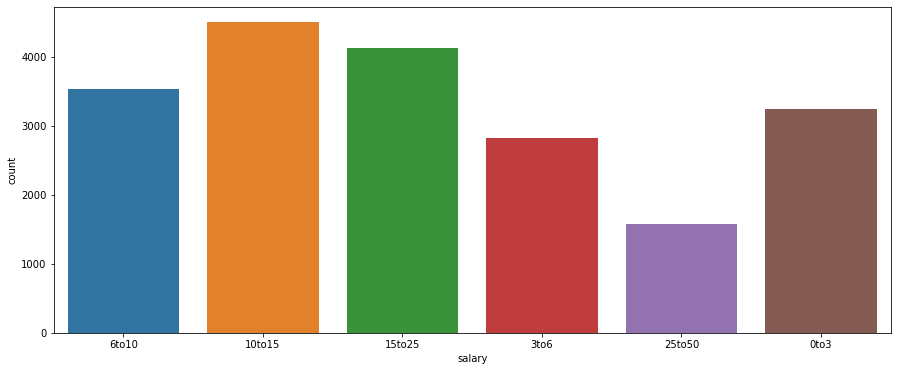

In [13]:
plt.figure(figsize = (15,6))
sns.countplot(train['salary'])
plt.show()

In [14]:
train.head()

,experience,job_description,job_desig,key_skills,location,salary,company_name_encoded
0,5-7 yrs,Exp: Minimum 5 years;Good understanding of IOC...,Senior Exploit and Vulnerability Researcher,"team skills, communication skills, analytical ...",Delhi NCR(Vikas Puri),6to10,3687
1,10-17 yrs,He should have handled a team of atleast 5-6 d...,Head SCM,"ppc, logistics, inventory management, supply c...",Sonepat,10to15,458
2,5-9 yrs,Must be an effective communicator (written & s...,Deputy Manager - Talent Management & Leadershi...,"HR Analytics, Employee Engagement, Training, S...",Delhi NCR,15to25,4195
3,7-10 yrs,7 - 10 years of overall experience in data e...,Associate Manager Data Engineering,"SQL, Javascript, Automation, Python, Ruby, Ana...",Bengaluru,10to15,313
4,1-3 yrs,Chartered Accountancy degree or MBA in Finance...,TS- GSA- Senior Analyst,"accounting, finance, cash flow, financial plan...",Gurgaon,3to6,1305


In [15]:
train['key_skills'] = train['key_skills'].str.lower()
train['job_desig'] = train['job_desig'].str.lower()
train['job_description'] = train['job_description'].str.lower()

In [16]:
train.reset_index(drop = True,inplace = True)



In [17]:

skills = {}
for i in train['salary'].unique():
    x = []
    data = train[train['salary']==i]
    data.reset_index(drop = True,inplace = True)
    for j in range(len(data)):
        for k in data['key_skills'][j][:-3].split(','):
            x.append(k.strip())
    print("{}: {}".format(i,len(set(x))))
    skills[i]=list(set(x))

6to10: 3856
10to15: 4676
15to25: 4100
3to6: 3407
25to50: 1930
0to3: 4120


In [18]:
len(np.intersect1d(np.array(skills['25to50']),np.array(skills['15to25'])))

1571

In [19]:
train['key_skills'][0][:-3].split(',')

['team skills',
 ' communication skills',
 ' analytical skills',
 ' problem solving']

### We will have to check later down the line whether this variable is having any significant impact on making predictions or not?

In [20]:
match_with_range = []
for j in range(len(train)):
    l = []
    for i in skills.keys():
        res = all(word.strip() in skills[i] for word in train['key_skills'][j][:-3].split(','))
        l.append(res)
    match_with_range.append(len(np.array(l)[np.array(l)==True]))

In [70]:
matcht_with_range = []
for j in range(len(test)):
    l = []
    for i in skills.keys():
        res = all(word.strip() in skills[i] for word in test['key_skills'][j][:-3].split(','))
        l.append(res)
    matcht_with_range.append(len(np.array(l)[np.array(l)==True]))

In [71]:
train['matchks_with_range']= match_with_range
test['matchks_with_range']= matcht_with_range

In [76]:
# test['matchks_with_range'].value_counts()

###### Create a new column called "match_with_range" to denote number of full skill matches with which salary range. all skills match will be counted. That will be the score.

In [22]:
train[train['matchks_with_range']==1]['salary'].value_counts()

0to3      1370
10to15     785
15to25     484
6to10      479
3to6       423
25to50     232
Name: salary, dtype: int64

In [23]:
#cat vs cat
testing = pd.crosstab(train['salary'],train['matchks_with_range'])
teststat,pvalue,dfdm,exp_freq = stats.chi2_contingency(testing)
pvalue

0.0

In [24]:
train.drop(['key_skills'],axis = 1,inplace = True)

In [25]:
train['min_exp_req'] = [int(i[0].strip()) for i in train['experience'].str.split('-')]
train['max_exp_req'] =[int(i[1].strip(' yrs')) for i in train['experience'].str.split('-')]

In [26]:
train.drop(['experience'],axis = 1,inplace = True)

###### Looking at job designations and which are the common designations for each paygrade

In [27]:
job_desig = {}
for i in train['salary'].unique():
    x = []
    data = train[train['salary']==i]
    data.reset_index(drop = True,inplace = True)
    for j in range(len(data)):
        for k in data['job_desig'][j].split():
            x.append(k.strip().lower())
    print("{}: {}".format(i,len(set(x))))
    job_desig[i]=list(set(x))

6to10: 3126
10to15: 3719
15to25: 3341
3to6: 2613
25to50: 1520
0to3: 3397


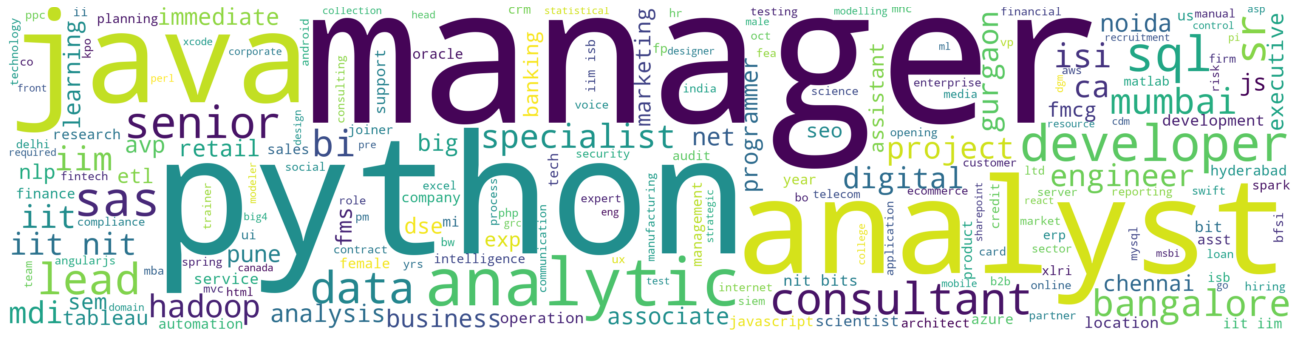

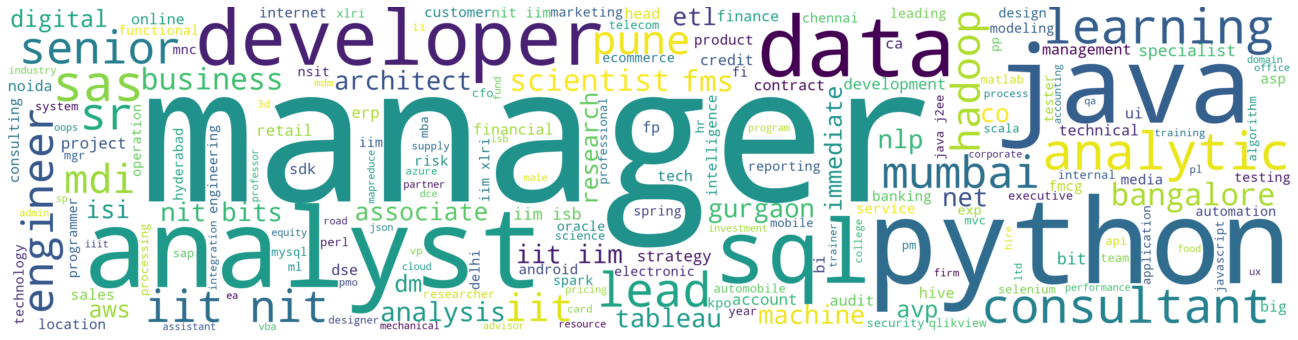

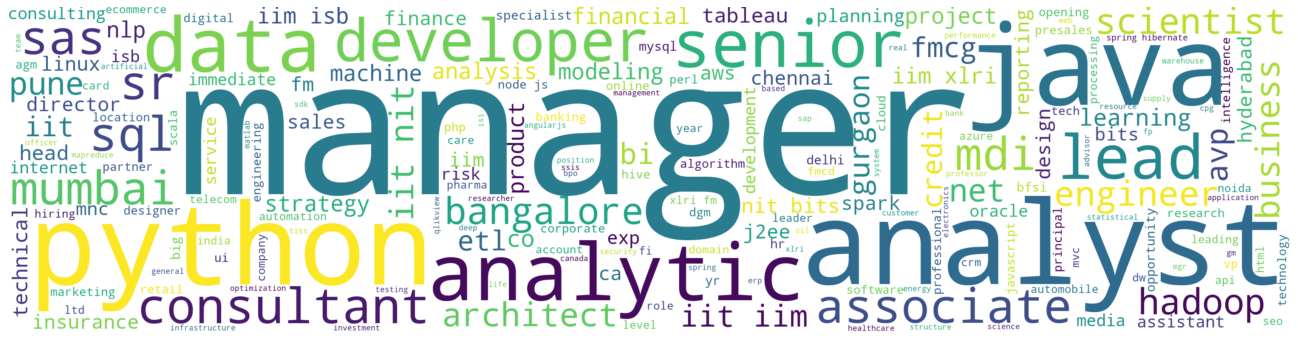

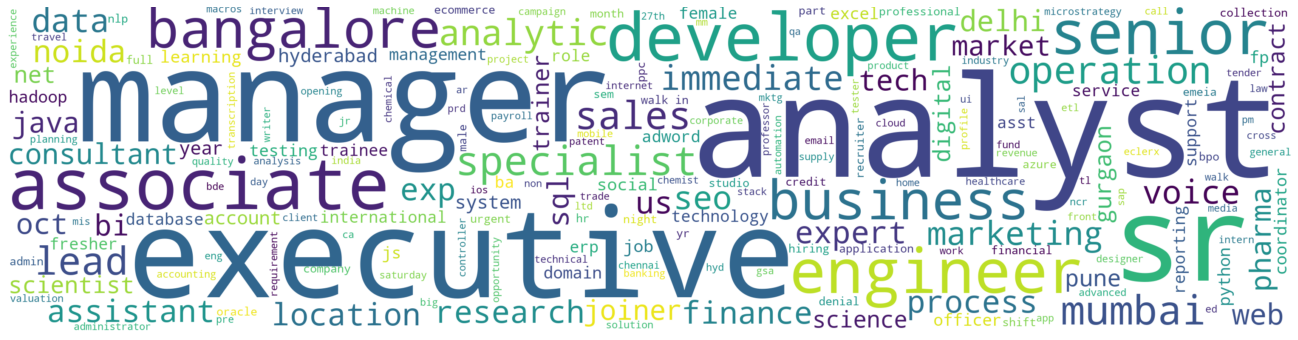

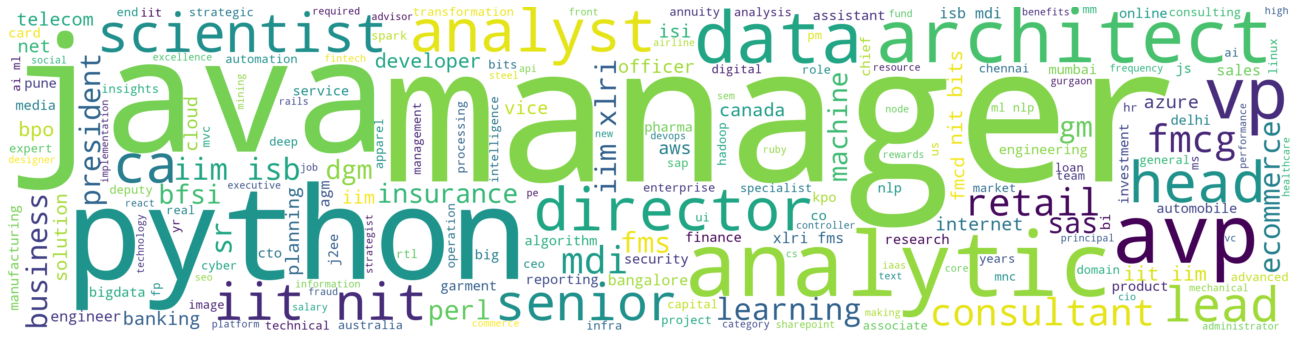

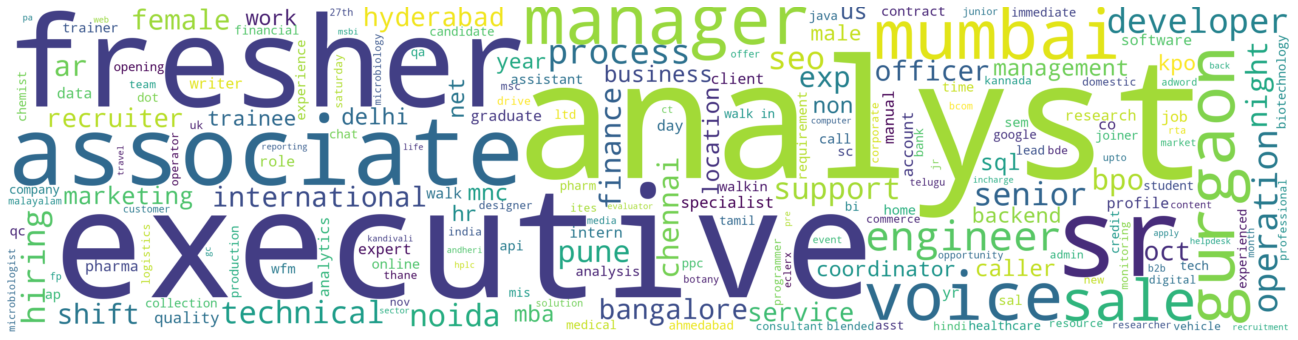

In [28]:
for i in job_desig.keys():
    plt.figure(figsize = (25,6))
    wordcloud = WordCloud(width = 3024, height = 768, 
                    background_color ='white', 
                    min_font_size = 10).generate(" ".join(job_desig[i])) 
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

#### Inferences from the job_designation wordclouds

* Gurgaon seems to be having more entry level jobs for freshers. 

* We can see that managerial posts are reserved for higher pay grades. As the pay grade increases the word manager becomes bigger in each word cloud and analyst becomes smaller. So if you are a fresher, you are most likely to start as a data analyst before transitioning into a managerial position in the future. Also words like developer, senior engineer show up at higher pay grades.

* At lower pay grade we see words like analyst, executive, associate show up but this gradually reduces with an increase in paygrade.

* An HR executive could very well use this world cloud to decide on what kind of designations should they offer their employees at what pay to be inline with the industry and make the organisation seem more professional in front of clients.

In [59]:
#Reduced unique locations in the dataset from 1504 to 216
def general_loc(x):
    y = x.split(',')
    if len(y)>1:
        return y[0]
    else:
        return x.partition('(')[0]

def conv_to_pan_india(x):
    y = x.split(',')
    if len(y)>2 or x.lower()=='india' or x == 'Other City' or x.split()[0].lower().strip() == 'anywhere' or x.lower().split()[0].lower()=='anywherein':
        return 'Across India'
    else:
        return x
for i in range(2):
    train['location'] = train['location'].apply(conv_to_pan_india).apply(general_loc)
    test['location'] = test['location'].apply(conv_to_pan_india).apply(general_loc)

In [60]:
train['location'].unique().shape,test['location'].unique().shape

((213,), (141,))

### Due to environment issues I decided to perform the lat long imputations in colab. I could have created a seperate environment for this project which is what I would usually do but colab worked for me.

In [61]:
# #Code for getting latitude and longitude 

# import pandas as pd
# import geopandas as gpd
# import geopy
# from geopy.geocoders import Nominatim
# from geopy.extra.rate_limiter import RateLimiter
# import matplotlib.pyplot as plt

# locator = Nominatim(user_agent="myGeocoder")
# location = locator.geocode("Champ de Mars, Paris, France")

# train = pd.read_csv('Data/Final_Train_Dataset.csv')
# test = pd.read_csv('Data/Final_Test_Dataset.csv')

# #Reduced unique locations in the dataset from 1504 to 216
# def general_loc(x):
#     y = x.split(',')
#     if len(y)>1:
#         return y[0]
#     else:
#         return x.partition('(')[0]

# def conv_to_pan_india(x):
#     y = x.split(',')
#     if len(y)>2 or x.lower()=='india' or x == 'Other City':
#         return 'Across India'
#     else:
#         return x

# train['location'] = train['location'].apply(conv_to_pan_india).apply(general_loc)
# test['location'] = test['location'].apply(conv_to_pan_india).apply(general_loc)

# loc = []
# import time
# locator = Nominatim(user_agent="myGeocoder")
# for i in train['location'].unique():
  
#   try:
#       locating = locator.geocode(i)
#       loc.append([locating.latitude,locating.longitude])
#       time.sleep(0.1)
#   except:
#     loc.append("Unavailable")
    
# testloc = []
# import time
# locator = Nominatim(user_agent="myGeocoder")
# for i in test['location'].unique():
  
#   try:
#       locating = locator.geocode(i)
#       testloc.append([locating.latitude,locating.longitude])
#       time.sleep(0.1)
#   except:
#     testloc.append("Unavailable")
    
# latlongtrain = dict(zip(train['location'].unique(),loc)) #Creating dictionaries to map to the columns
# latlongtest = dict(zip(test['location'].unique(),testloc))

# #Saving to pickle to be able to load the files into local jupyter notebook
# import pickle
# try:
#   file = open('trainlatlong.txt','wb')
#   pickle.dump(latlongtrain,file)
#   file.close()
# except Exception as e:
#   print(e)

# try:
#   file = open('testlatlong.txt','wb')
#   pickle.dump(latlongtest,file)
#   file.close()
# except Exception as e:
#   print(e)

### Loading the pickle files containing lat and long

In [62]:
import pickle
file1 = open('latlong/trainlatlong1.txt','rb')
file2 = open('latlong/testlatlong.txt','rb')
#Each entry is in the form [latitude,longitude]
testlatlong = pickle.load(file2)
trainlatlong = pickle.load(file1)
trainlatlong.update({"Kiadb Vemegal": ['13.1824073', '78.0324753'],"Bhilai/Bhillai": ['21.1938', '81.3509']}) #These values had got undesired for latitude and longitude
testlatlong.update({"Bihar Other":[25.0961,85.3131]})

In [63]:
len(trainlatlong.keys())

261

In [64]:
len(trainlatlong.keys()),len(testlatlong.keys())

(261, 162)

In [65]:
train['latitude'] = [float(i[0]) for i in train['location'].map(trainlatlong)]
train['longitude'] = [float(i[1]) for i in train['location'].map(trainlatlong)]


test['latitude'] = [float(i[0]) for i in test['location'].map(testlatlong)]
test['longitude'] = [float(i[1]) for i in test['location'].map(testlatlong)]

In [67]:
train.drop('location',axis = 1,inplace = True)
test.drop('location',axis = 1,inplace = True)

In [79]:
new_train = train[['salary','company_name_encoded','matchks_with_range','min_exp_req','max_exp_req','latitude','longitude']]

In [85]:
new_train['company_name_encoded'] = new_train['company_name_encoded'].astype('category')

In [89]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19801 entries, 0 to 19800
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   salary                19801 non-null  object  
 1   company_name_encoded  19801 non-null  category
 2   matchks_with_range    19801 non-null  int64   
 3   min_exp_req           19801 non-null  int64   
 4   max_exp_req           19801 non-null  int64   
 5   latitude              19801 non-null  float64 
 6   longitude             19801 non-null  float64 
dtypes: category(1), float64(2), int64(3), object(1)
memory usage: 1.1+ MB


In [151]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(new_train['salary'])
x = new_train.drop(['salary','company_name_encoded','matchks_with_range','max_exp_req'],axis = 1)

In [152]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,mean_squared_error
from sklearn.model_selection import train_test_split

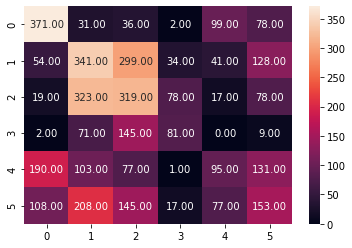

0.34334763948497854

In [153]:
knn = KNeighborsClassifier()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
sns.heatmap(confusion_matrix(y_test,pred),annot = True,fmt = '.2f')
plt.show()
knn.score(x_test,y_test)

0.3713708659429437


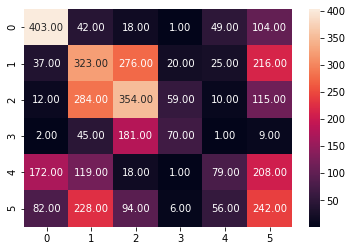

In [160]:
rfc = RandomForestClassifier()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)
rfc.fit(x_train,y_train)
print(rfc.score(x_test,y_test))
pred = rfc.predict(x_test)
sns.heatmap(confusion_matrix(y_test,pred),annot = True,fmt = '.2f')
plt.show()

In [162]:
x.columns

Index(['min_exp_req', 'latitude', 'longitude'], dtype='object')